C:\Users\Sule Odu Shbomi\anaconda3\New folder\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\Sule Odu Shbomi\AppData\Local\Temp\ipykernel_39000\3939860227.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cluster_data_test.csv')


No negative values found in numerical columns.
All columns contain numeric values. Fitting KMeans model...


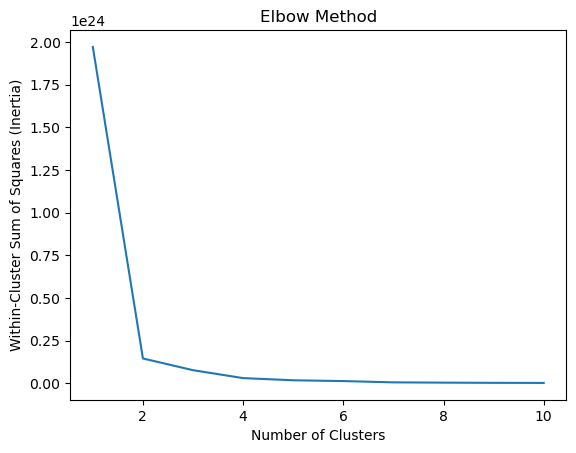

In [2]:
#pip install --upgrade scikit-learn threadpoolctl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Read the data
df = pd.read_csv('cluster_data_test.csv')
df.drop(['Acct_ID', 'AGE INTERVAL'], axis='columns', inplace=True)

# Perform one-hot encoding for categorical variables
dfs = pd.get_dummies(df, columns=['GENDER', 'ZONE', 'SUB_SEGMENT', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS'])

# Remove commas, non-numeric characters, and convert 'BAL_SUM' and ' PROFTI ' columns to float
numeric_columns = [' CR SUM ', ' DR SUM ', ' BAL_SUM ', ' PROFTI ']
for column in numeric_columns:
    dfs[column] = pd.to_numeric(dfs[column].astype(str).str.replace(',', ''), errors='coerce')

# Handle negative values for specified numerical columns
columns_to_check = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT', 
                    'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 
                    'FIXED DEPOSIT', 'TERM LOAN', ' PROFTI ']

# List to store columns with negative values
columns_with_negative_values = []

# Iterate over numerical columns to handle negative values and locate them
for column in columns_to_check:
    # Handle negative values
    dfs[column] = dfs[column].apply(lambda x: 0 if isinstance(x, str) and '-' in x else x)
    
    # Locate negative values
    negative_rows = dfs[dfs[column] < 0]
    if not negative_rows.empty:
        print(f"Negative values found in column '{column}':")
        print(negative_rows)
        columns_with_negative_values.append(column)

# Print columns with negative values
if not columns_with_negative_values:
    print("No negative values found in numerical columns.")
else:
    print("Columns with negative values:")
    print(columns_with_negative_values)

# Select numerical columns (excluding 'Acct_ID')
numerical_columns = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD',  'CURRENT ACCOUNT', 
                     'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 'FIXED DEPOSIT', 'TERM LOAN']

# Convert numerical columns to float
for column in numerical_columns:
    dfs[column] = dfs[column].astype(float)

# Check for NaN or infinity values and handle them
dfs.replace([np.inf, -np.inf], np.nan, inplace=True)
dfs.dropna(inplace=True)

# Check if any column contains non-numeric values
non_numeric_columns = dfs.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    print("Columns with non-numeric values:")
    print(non_numeric_columns)
    # Optionally, print rows with non-numeric values for each column
    for column in non_numeric_columns:
        non_numeric_rows = dfs[dfs[column].apply(lambda x: isinstance(x, str))]
        print(f"Rows with non-numeric values in column '{column}':")
        print(non_numeric_rows)
else:
    print("All columns contain numeric values. Fitting KMeans model...")

# Concatenate numerical and one-hot encoded categorical features into X
X = pd.concat([dfs[numerical_columns], dfs.drop(columns=numerical_columns)], axis=1)

# Calculate within-cluster sum of squares for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()


C:\Users\Sule Odu Shbomi\AppData\Local\Temp\ipykernel_39000\1552467453.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cluster_data_test.csv')


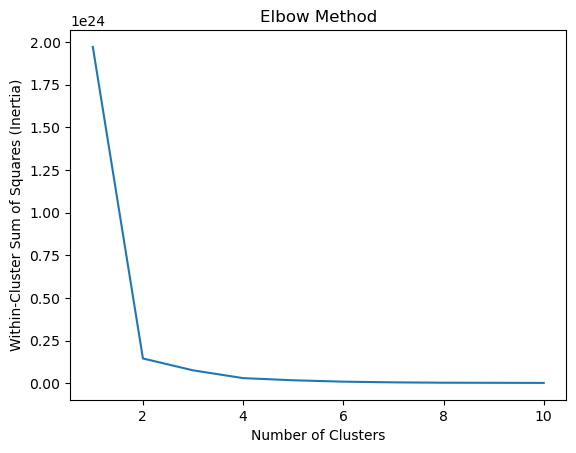

499999
499999


NameError: name 'confusion_matrix' is not defined

In [3]:
# Read the data
df = pd.read_csv('cluster_data_test.csv')
df.drop(['AGE INTERVAL'], axis='columns', inplace=True)  # Remove 'AGE INTERVAL'

# Use 'Acct_ID' as predefined segments
predefined_segments = df['Acct_ID']  # Assuming 'Acct_ID' column exists in your dataset
df.drop('Acct_ID', axis='columns', inplace=True)  # Remove 'Acct_ID' from the dataframe

# Perform one-hot encoding for categorical variables
dfs = pd.get_dummies(df, columns=['GENDER', 'ZONE', 'SUB_SEGMENT', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS'])

# Convert numerical columns to float
numeric_columns = [' CR SUM ', ' DR SUM ', ' BAL_SUM ', ' PROFTI ']
for column in numeric_columns:
    dfs[column] = pd.to_numeric(dfs[column].astype(str).str.replace(',', ''), errors='coerce')

# Handle negative values for specified numerical columns
columns_to_check = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT',
                    'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS',
                    'FIXED DEPOSIT', 'TERM LOAN', ' PROFTI ']

for column in columns_to_check:
    # Handle negative values
    dfs[column] = dfs[column].apply(lambda x: 0 if isinstance(x, str) and '-' in x else x)

# Select numerical columns
numerical_columns = ['AGE', 'Internet_banking', 'Mobile_Banking', 'USSD', 'CURRENT ACCOUNT',
                     'PERSONAL LOAN', 'VAF LOAN', 'HOME LOAN', 'CREDIT CARD', 'SAVINGS', 'FIXED DEPOSIT', 'TERM LOAN']

# Convert numerical columns to float
for column in numerical_columns:
    dfs[column] = dfs[column].astype(float)

# Check for NaN or infinity values and handle them
dfs.replace([np.inf, -np.inf], np.nan, inplace=True)
dfs.dropna(inplace=True)

# Concatenate numerical and one-hot encoded categorical features into X
X = pd.concat([dfs[numerical_columns], dfs.drop(columns=numerical_columns)], axis=1)

# Calculate within-cluster sum of squares for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):  # Try different numbers of clusters
    model = KMeans(n_clusters=n_clusters)
    model.fit(X)
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method')
plt.show()

# Get cluster labels from KMeans
cluster_labels = model.labels_

# Check if the length of predefined_segments is greater than cluster_labels
if len(predefined_segments) > len(cluster_labels):
    # If predefined_segments is longer, remove the extra elements
    predefined_segments = predefined_segments.iloc[:len(cluster_labels)]
elif len(cluster_labels) > len(predefined_segments):
    # If cluster_labels is longer, remove the extra elements
    cluster_labels = cluster_labels[:len(predefined_segments)]

# Now both arrays should have equal lengths
print(len(predefined_segments))
print(len(cluster_labels))

# Convert predefined_segments to numeric if necessary
if predefined_segments.dtype != 'int':
    predefined_segments = pd.to_numeric(predefined_segments, errors='coerce')

# Construct confusion matrix
cm = confusion_matrix(predefined_segments, cluster_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)
